In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [61]:
with open('../../output/weights/p_date=2022-09-14-12_20_54/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

59001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [62]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [63]:
def plot(data, title, labelX, labelY):
    interval = 1000
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    
    
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

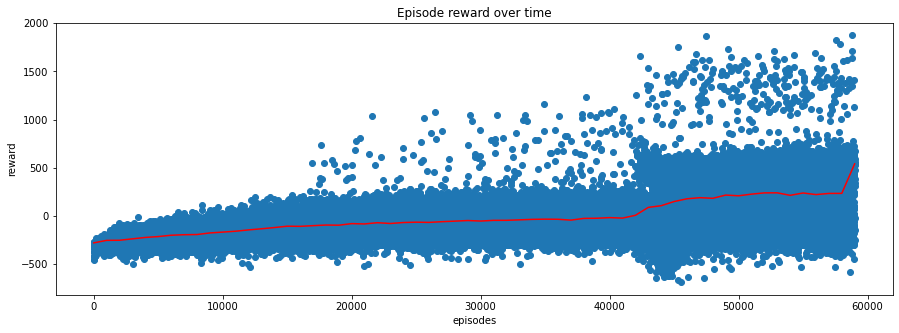

Maximum: 1873.8000000000002
Average: -24.429994406874993
Moving Average (simple): {0: -280.8, 1000: -254.7, 2000: -253.6, 3000: -238.9, 4000: -224.4, 5000: -215.2, 6000: -201.5, 7000: -196.1, 8000: -194.2, 9000: -177.8, 10000: -168.8, 11000: -159.7, 12000: -146.1, 13000: -134.5, 14000: -121.8, 15000: -107.6, 16000: -109.1, 17000: -102.0, 18000: -95.7, 19000: -97.2, 20000: -81.0, 21000: -84.1, 22000: -71.3, 23000: -79.6, 24000: -69.4, 25000: -65.9, 26000: -68.1, 27000: -60.7, 28000: -55.1, 29000: -48.7, 30000: -54.1, 31000: -47.0, 32000: -46.6, 33000: -41.8, 34000: -36.7, 35000: -34.5, 36000: -35.7, 37000: -44.5, 38000: -26.7, 39000: -25.0, 40000: -18.5, 41000: -23.6, 42000: 5.5, 43000: 87.8, 44000: 105.2, 45000: 148.4, 46000: 177.0, 47000: 188.5, 48000: 182.1, 49000: 215.6, 50000: 208.1, 51000: 225.2, 52000: 238.3, 53000: 238.8, 54000: 212.9, 55000: 237.2, 56000: 220.6, 57000: 232.6, 58000: 233.1, 59000: 539.7}

Moving Average: ['+1496% (87.8 | -131%)', '+19% (105.2 | -137%)', '+41% (1

In [64]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

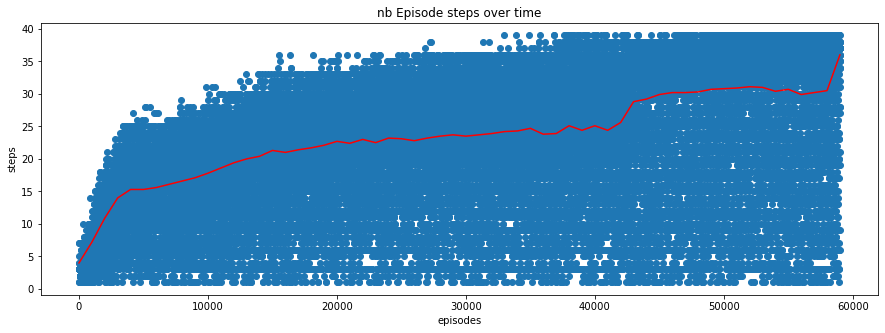

Maximum: 39
Average: 23.169454755004153
Moving Average (simple): {0: 4.0, 1000: 7.2, 2000: 10.9, 3000: 14.0, 4000: 15.3, 5000: 15.3, 6000: 15.6, 7000: 16.1, 8000: 16.6, 9000: 17.1, 10000: 17.8, 11000: 18.6, 12000: 19.4, 13000: 20.0, 14000: 20.4, 15000: 21.3, 16000: 21.0, 17000: 21.4, 18000: 21.7, 19000: 22.1, 20000: 22.7, 21000: 22.4, 22000: 23.0, 23000: 22.5, 24000: 23.2, 25000: 23.1, 26000: 22.8, 27000: 23.2, 28000: 23.5, 29000: 23.7, 30000: 23.5, 31000: 23.7, 32000: 23.9, 33000: 24.2, 34000: 24.3, 35000: 24.7, 36000: 23.8, 37000: 23.9, 38000: 25.1, 39000: 24.4, 40000: 25.1, 41000: 24.4, 42000: 25.6, 43000: 28.8, 44000: 29.2, 45000: 29.9, 46000: 30.2, 47000: 30.2, 48000: 30.3, 49000: 30.7, 50000: 30.8, 51000: 30.9, 52000: 31.1, 53000: 31.0, 54000: 30.4, 55000: 30.7, 56000: 29.9, 57000: 30.2, 58000: 30.5, 59000: 36}

Moving Average: ['+80% (7.2 | 80%)', '+51% (10.9 | 172%)', '+28% (14.0 | 250%)', '+9% (15.3 | 282%)', '0% (15.3 | 282%)', '+1% (15.6 | 290%)', '+3% (16.1 | 302%)', '+3% (

In [65]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

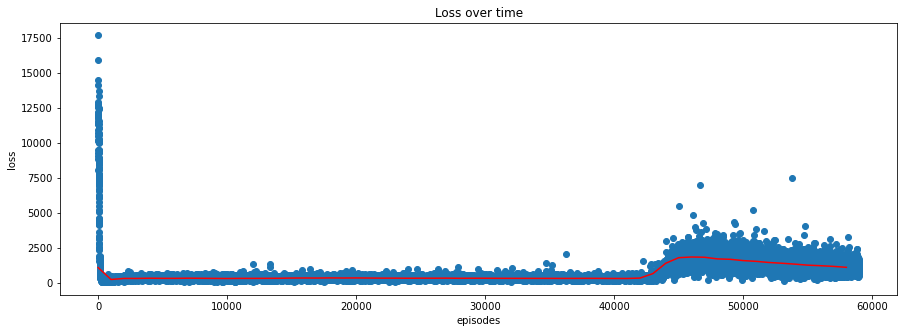

Maximum: 17665.97265625
Average: 650.8893864628322
Moving Average (simple): {0: 1102.9, 1000: 252.9, 2000: 326.4, 3000: 326.3, 4000: 341.3, 5000: 332.7, 6000: 332.4, 7000: 343.9, 8000: 336.5, 9000: 328.4, 10000: 322.0, 11000: 330.2, 12000: 329.9, 13000: 332.8, 14000: 336.9, 15000: 352.7, 16000: 356.8, 17000: 353.1, 18000: 363.4, 19000: 356.3, 20000: 362.0, 21000: 353.5, 22000: 346.6, 23000: 346.6, 24000: 340.0, 25000: 343.4, 26000: 342.2, 27000: 346.8, 28000: 336.0, 29000: 341.1, 30000: 339.7, 31000: 335.0, 32000: 333.2, 33000: 331.9, 34000: 330.4, 35000: 330.3, 36000: 328.0, 37000: 329.6, 38000: 333.7, 39000: 329.4, 40000: 324.3, 41000: 323.8, 42000: 351.8, 43000: 670.3, 44000: 1409.8, 45000: 1806.5, 46000: 1855.1, 47000: 1838.4, 48000: 1720.6, 49000: 1690.9, 50000: 1599.6, 51000: 1545.9, 52000: 1463.9, 53000: 1411.2, 54000: 1346.8, 55000: 1273.9, 56000: 1234.0, 57000: 1186.5, 58000: 1119.8}

Moving Average: ['-77% (252.9 | -77%)', '+29% (326.4 | -70%)', '0% (326.3 | -70%)', '+4% (341

In [66]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")